In [1]:
import pandas as pd
import sqlalchemy
import mysql.connector
import csv
import missingno as msno 
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import re
plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline



#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys  
dat = pd.read_csv('/home/apprenant/Desktop/FARIZD/FOOD/Data/en.openfoodfacts.org.products.tsv', sep='\t')
data = dat.sample(n=30000)


#On peut ensuite importer le dossier comme un module


/home/apprenant/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Lecture de la data

## J'importe mon fichier tsv que je lis, la données étant importante je recupere 30000 lignes aléatoirement grâce au .sample qui correspond à 10% de la base de données

In [2]:
print(data.head())



                 code                                                url  \
158265   845901061428  http://world-en.openfoodfacts.org/product/0845...   
184533       20815400  http://world-en.openfoodfacts.org/product/2081...   
294968  5000147030262  http://world-en.openfoodfacts.org/product/5000...   
325211  7613312087077  http://world-en.openfoodfacts.org/product/7613...   
8577      11213381039  http://world-en.openfoodfacts.org/product/0011...   

                creator   created_t      created_datetime last_modified_t  \
158265  usda-ndb-import  1489075630  2017-03-09T16:07:10Z      1489075630   
184533  date-limite-app  1475654837  2016-10-05T08:07:17Z      1489141260   
294968  usda-ndb-import  1489137908  2017-03-10T09:25:08Z      1489137909   
325211  date-limite-app  1475422302  2016-10-02T15:31:42Z      1486505665   
8577    usda-ndb-import  1489066879  2017-03-09T13:41:19Z      1489066880   

       last_modified_datetime                            product_name  \
158265 

In [3]:
print(data.dtypes)

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 163, dtype: object


In [4]:
print(data.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' 

### J'affiche les colonnes je remarque qu'il y a certaines redondanse que je vais vérifier par la suite ce qui me permet d'avoir aussi déjà qu'elle donnée peux m'intérrésser ou non pour le calcul de mon nutriscore 

<AxesSubplot:>

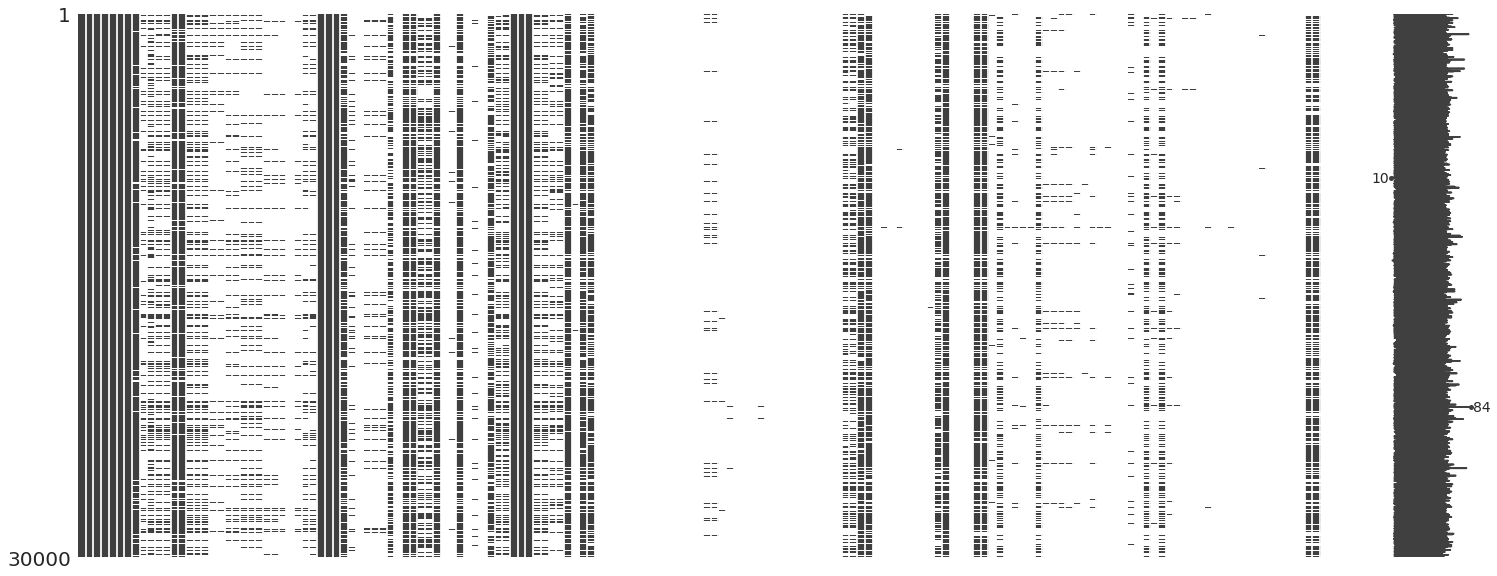

In [5]:
msno.matrix(data)

## Tentative de graphique des données des valeur manquante non lisible je regarde dont avec la méthode num_missing qui compte les valeur manquante ceux qui sont = à 30000 je vais donc les supprimer 

In [6]:
def num_missing(x):
    return sum(x.isnull())

print(data.apply(num_missing, axis=0).values)

[    1     1     1     0     0     0     0  1480 25036 19808 22277 22277
  2486  2489 21164 21165 21164 27909 27914 26495 26495 25090 25083 25082
 27233 27234 28201 29999 28069 24367 25058    21    21    21  6035 26886
 29999 27542 27543 27542 11757 30000  6036  6038 15667 15667  6036 30000
 29426  6036 30000 28781 30000  8447 19017 18719     3     3     3 21167
 21167 23516 23516  5131 29917  6379  7650 30000 30000 30000 30000 30000
 30000 30000 30000 29999 29999 30000 30000 30000 30000 28097 28098 29914
 29983 29998 29996 29974 29986 30000 29999 29999 29997 29999 30000 29999
 30000 30000 30000 17862 17777  6415  6458 29990 29997 29998 29976 30000
 30000 29980 29958 11355  5212 29999 30000 30000  5592  5599 29651 18368
 29998 29359 29876 29918 18096 29044 29062 29007 29445 29540 29759 29570
 29977 29801 29994 29993 27945 29987 17994 29506 18083 29470 29674 29838
 29877 29993 29902 29999 30000 29971 29993 29998 29994 29747 29972 29985
 29887 30000 29979  8447  8447 30000 30000]


In [7]:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0))

Valeurs manquantes par colonne:
code                           1
url                            1
creator                        1
created_t                      0
created_datetime               0
                           ...  
carbon-footprint_100g      29979
nutrition-score-fr_100g     8447
nutrition-score-uk_100g     8447
glycemic-index_100g        30000
water-hardness_100g        30000
Length: 163, dtype: int64


## Cette méthode me permet d'avoir certain nom de colonne mais surtout de voir que j'ai 163 colonnes pour le moment 

In [8]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=30, height=6):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold') 
    
    return plt.show()

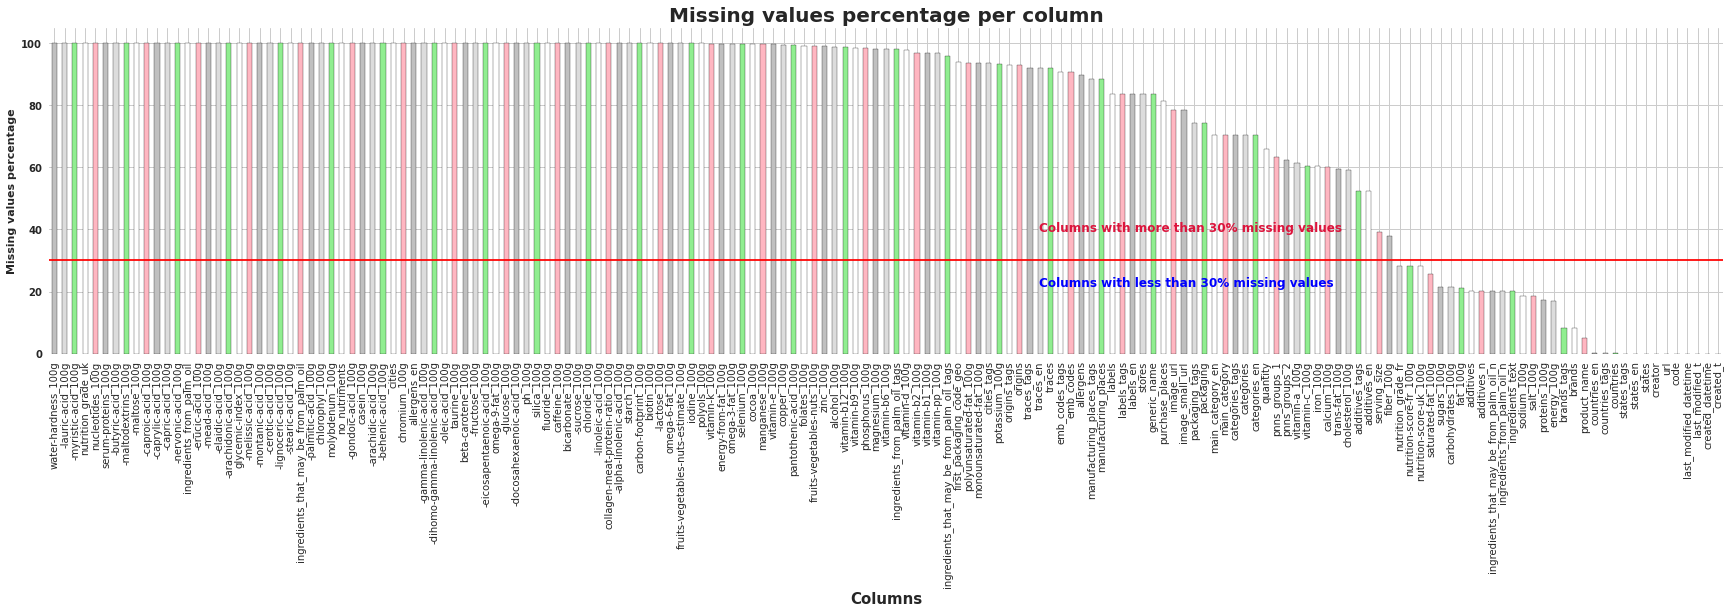

In [9]:
msv1(data,30, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

In [10]:
count_null = data.isnull().sum()/ data.shape[0] * 100
count_null

code                         0.003333
url                          0.003333
creator                      0.003333
created_t                    0.000000
created_datetime             0.000000
                              ...    
carbon-footprint_100g       99.930000
nutrition-score-fr_100g     28.156667
nutrition-score-uk_100g     28.156667
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 163, dtype: float64

### Count_null me permet d'avoir les info en pourcentage des données manquantes 

In [11]:
#Empty Column >= 100%
null_col = count_null[count_null >= 100].index
null_col

Index(['no_nutriments', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g', '-lignoceric-acid_100g',
       '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g',
       '-arachidonic-acid_100g', '-elaidic-acid_100g', '-mead-acid_100g',
       '-erucic-acid_100g', '-nervonic-acid_100g', '-maltose_100g',
       '-maltodextrins_100g', 'serum-proteins_100g', 'nucleotides_100g',
       'molybdenum_100g', 'chlorophyl_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object')

### Grâce au pourcentage récuppérer cette ligne me permet d'avoir les noms de colonnes qui ont 100% des données manquantes

In [12]:
data = data.drop(['no_nutriments', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g', '-lignoceric-acid_100g',
       '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g',
       '-elaidic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g',
       '-nervonic-acid_100g', '-maltose_100g', 'nucleotides_100g',
       'chromium_100g', 'molybdenum_100g', 'chlorophyl_100g',
       'glycemic-index_100g', 'water-hardness_100g'], axis=1) 

### Je supprime donc les colonnes avec les 100% de données manquante  je verifie en dessous combien il me reste de colonnes 136 c'est correct car au début nous étions à 163 

In [13]:
data.shape

(30000, 136)

In [14]:
print(data.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_fr'
 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags' 'states_en'
 'main_category' 'main_category_en' 'image_url' 'image_small_url'
 'energy_100g' 'energy-from-fa

### Maintenant j'identifie les métadonnées et les supprimes car non utile 

In [15]:
data = data.drop(['code','url','creator','created_t','created_datetime','last_modified_t'
,'last_modified_datetime'], axis=1) 

In [16]:
data.shape

(30000, 129)

In [17]:
print (data[[ 'ingredients_from_palm_oil_n','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_tags' ]].sample(n=30))

print (data[['image_url']].sample(n=30))

print (data[[ 'pnns_groups_1','pnns_groups_2']].sample(n=30))
print (data[['packaging','packaging_tags']].sample(n=30))

        ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
137060                          0.0                            NaN   
354926                          NaN                            NaN   
298878                          NaN                            NaN   
214400                          NaN                            NaN   
133367                          0.0                            NaN   
188288                          NaN                            NaN   
179565                          NaN                            NaN   
228552                          0.0                            NaN   
170189                          0.0                            NaN   
73528                           0.0                            NaN   
184227                          0.0                            NaN   
252708                          NaN                            NaN   
160146                          0.0                            NaN   
219557              

In [18]:
#data = data.drop(['origins','origins_tags','manufacturing_places','manufacturing_places_tags','labels','labels_tags','labels_en','emb_codes','emb_codes_tags','first_packaging_code_geo','cities','cities_tags','purchase_places','stores','pnns_groups_1','pnns_groups_2','image_url','image_small_url'], axis=1)

In [19]:
data.shape

(30000, 129)

In [20]:
print(data.columns.values)

['product_name' 'generic_name' 'quantity' 'packaging' 'packaging_tags'
 'brands' 'brands_tags' 'categories' 'categories_tags' 'categories_en'
 'origins' 'origins_tags' 'manufacturing_places'
 'manufacturing_places_tags' 'labels' 'labels_tags' 'labels_en'
 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo' 'cities'
 'cities_tags' 'purchase_places' 'stores' 'countries' 'countries_tags'
 'countries_en' 'ingredients_text' 'allergens' 'allergens_en' 'traces'
 'traces_tags' 'traces_en' 'serving_size' 'additives_n' 'additives'
 'additives_tags' 'additives_en' 'ingredients_from_palm_oil_n'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_fr'
 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags' 'states_en'
 'main_category' 'main_category_en' 'image_url' 'image_small_url'
 'energy_100g' 'energy-from-fat_100g' 'fat_100g' 'saturated-fat_100g'
 '-arachidic-acid_100g' '-behenic-acid_100g' 'monounsatura

In [21]:
data = data[['countries', 'categories', 'product_name', 'energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr','fat_100g','additives_n','additives','additives_tags']]

In [22]:
data.head()

,countries,categories,product_name,energy_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fat_100g,additives_n,additives,additives_tags
158265,US,NaN,Raw Cold Pressed Juice Blend Drink,159.0,7.63,0.0,0.42,0.021000,0.00,1.0,b,0.00,0.0,[ organic-juice-from -> en:organic-juice-from...,NaN
184533,Deutschland,"Salty snacks,Appetizers",Cashew-Cranberry-Mix,1959.0,39.10,5.1,9.80,0.011811,4.70,12.0,d,24.10,0.0,[ 50-ceshewkerne -> de:50-ceshewkerne ] [ 5...,NaN
294968,US,NaN,Fruit Juice,33.0,0.70,0.3,0.20,0.100000,NaN,NaN,NaN,NaN,6.0,[ water -> en:water ] [ orange-fruit-from-c...,"en:e202,en:e223,en:e330,en:e331,en:e951,en:e954"
325211,en:CH,NaN,Quinoa Mix,1470.0,2.00,8.0,15.00,0.039370,0.50,-6.0,a,3.50,0.0,[ quinoa -> fr:quinoa ] [ blanc -> fr:blanc...,NaN
8577,US,NaN,Finely Shredded Mexican Style 4 Cheese,1644.0,0.00,0.0,21.43,0.714000,21.43,21.0,e,32.14,2.0,[ monterey-jack-cheese -> en:monterey-jack-ch...,"en:e160b,en:e235"


In [25]:
print (data[['sugars_100g']].sample(n=30))

        sugars_100g
309369         5.00
304813          NaN
232283          NaN
188794        79.00
30418        100.00
143075         3.57
35802          2.21
264701          NaN
31408          4.70
136409        75.00
166717        24.73
128962         3.33
134906         0.00
117182        12.39
210002          NaN
291829          NaN
149481         3.31
344808         0.40
284235        44.70
99138          6.47
260287         3.20
116257         4.20
169871         6.67
267737        60.00
184324         0.00
51963         17.86
250486        14.00
300032        21.00
339904          NaN
117600         0.00


In [26]:
print (data[['countries']].sample(n=30))

          countries
48518            US
117572           US
237287       France
155843           US
313580           US
317775        en:CH
276304       France
162372           US
315672       Suisse
137747           US
271806       France
224387       France
323882       Suisse
107710           US
29583            US
6484             US
283669  Deutschland
86118            US
238586       France
121734           US
41097            US
237456       France
28601            US
26472            US
90126            US
353285       France
339925           US
62548            US
41635            US
47641         en:US


In [27]:
data["countries"] = data["countries"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x )


In [28]:
list (data["countries"].unique())

['US',
 'Deutschland',
 'en:CH',
 'France',
 'España',
 'Suisse',
 'United States',
 'en:DE',
 'United Kingdom',
 'en:BE',
 'Switzerland',
 'en:AU',
 'Magyarország',
 'Portugal',
 'Deutschland,Schweiz',
 'Россия',
 'Guyane',
 'Schweiz',
 'Australia',
 'Belgique',
 'en:ES',
 'en:FI',
 'België',
 'en:CA',
 'Canada',
 'Suiza,España',
 'en:IT',
 'Serbia',
 'en:GB',
 'en:MX',
 'en:MA',
 'en:BR',
 'en:RO',
 'en:US',
 'en:AM',
 'Belgium',
 'en:CZ',
 'Brazil',
 'Québec',
 'en:JP',
 'en:SI',
 'Madagascar',
 'Chile',
 'en:TH',
 'Spain',
 'Alemania, España',
 'en:CA, US',
 'Poland',
 'Netherlands',
 'en:MQ',
 'Nederland',
 'Turquie',
 'en:RU',
 'en:LU',
 'en:Hungary',
 'en:AR',
 'Germany,Switzerland',
 'en:HK',
 'Hungary',
 'Philippines',
 'New Zealand',
 'Österreich',
 'en:BF',
 'Germany',
 nan,
 'Suède',
 'Iceland',
 'Italien',
 'en:spain',
 'South Korea',
 'Japan',
 'Italia',
 'en:TW',
 'United Kingdom,United States,Scotland',
 'en:NO',
 'India',
 'Luxembourg',
 'Hong Kong',
 'en:NL',
 'en:PH'

In [29]:
data.countries == 'France'

158265    False
184533    False
294968    False
325211    False
8577      False
          ...  
162821    False
349332     True
64787     False
62236     False
31082     False
Name: countries, Length: 30000, dtype: bool

In [30]:
data = data.loc[data.countries == 'France']

In [31]:
data.head()

,countries,categories,product_name,energy_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fat_100g,additives_n,additives,additives_tags
128803,France,Biscuits,Pim's Orange,1670.0,56.0,0.0,4.0,0.140000,6.0,20.0,e,12.0,8.0,[ orange-filling -> en:orange-filling ] [ f...,"en:e322,en:e322i,en:e330,en:e331,en:e333,en:e4..."
230661,France,"Surgelés,Plats préparés,Plats cuisinés surgelé...","Couscous royal au poulet, merguez et agneau, S...",531.0,2.0,1.6,8.3,0.275591,1.5,-2.0,a,4.1,4.0,[ viande-et-legumes-en-sauce-70 -> fr:viande-...,"en:e162,en:e316,en:e450,en:e450i,en:e450v"
258007,France,"Édulcorants,Sirops,Sirops traditionnels,Sirops...",Sirop de pêche & abricot de Provence,1351.0,78.0,NaN,0.0,0.000000,0.0,14.0,d,0.0,3.0,[ sucre-de-canne -> fr:sucre-de-canne ] [ s...,"en:e163,en:e330,en:e445"
130212,France,NaN,Sauce Au Chocolat Et Caramel,2280.0,58.4,NaN,1.7,0.236220,22.1,28.0,e,35.7,0.0,[ ingredien-double-cream -> fr:ingredien-doub...,NaN
330146,France,"Poivres,Poivres en grains",Voatsiperifery &quot;Wild&quot; Pepper -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data = data[data["product_name"].isnull() == False]

In [33]:
data.shape

(10326, 15)

In [34]:
data["product_name"].isnull().sum() 

0

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10326 entries, 128803 to 349332
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   countries                10326 non-null  object 
 1   categories               6497 non-null   object 
 2   product_name             10326 non-null  object 
 3   energy_100g              8071 non-null   float64
 4   sugars_100g              7928 non-null   float64
 5   fiber_100g               5417 non-null   float64
 6   proteins_100g            8058 non-null   float64
 7   sodium_100g              7933 non-null   float64
 8   saturated-fat_100g       7920 non-null   float64
 9   nutrition-score-fr_100g  7791 non-null   float64
 10  nutrition_grade_fr       7791 non-null   object 
 11  fat_100g                 6834 non-null   float64
 12  additives_n              7332 non-null   float64
 13  additives                7331 non-null   object 
 14  additives_tags  

In [49]:
col = ['energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g']

for cols in col:
    data.dropna(how ='all')

In [65]:
data = data.dropna(subset=['fat_100g','energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g'],how ='all')

In [66]:
data.head()

,countries,categories,product_name,energy_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fat_100g,additives_n,additives,additives_tags
128803,France,Biscuits,Pim's Orange,1670.0,56.0,0.0,4.0,0.140000,6.0,20.0,e,12.0,8.0,[ orange-filling -> en:orange-filling ] [ f...,"en:e322,en:e322i,en:e330,en:e331,en:e333,en:e4..."
230661,France,"Surgelés,Plats préparés,Plats cuisinés surgelé...","Couscous royal au poulet, merguez et agneau, S...",531.0,2.0,1.6,8.3,0.275591,1.5,-2.0,a,4.1,4.0,[ viande-et-legumes-en-sauce-70 -> fr:viande-...,"en:e162,en:e316,en:e450,en:e450i,en:e450v"
258007,France,"Édulcorants,Sirops,Sirops traditionnels,Sirops...",Sirop de pêche & abricot de Provence,1351.0,78.0,NaN,0.0,0.000000,0.0,14.0,d,0.0,3.0,[ sucre-de-canne -> fr:sucre-de-canne ] [ s...,"en:e163,en:e330,en:e445"
130212,France,NaN,Sauce Au Chocolat Et Caramel,2280.0,58.4,NaN,1.7,0.236220,22.1,28.0,e,35.7,0.0,[ ingredien-double-cream -> fr:ingredien-doub...,NaN
193303,France,"Iles Flottantes,Desserts lactés à la vanille,F...",L’île Flottante aux Éclats de Caramel,561.0,20.0,0.2,4.7,0.066929,1.7,4.0,c,3.3,2.0,[ ile-flottante -> fr:ile-flottante ] [ ile...,"en:e412,en:e415"


In [67]:
data.shape

(8100, 15)